In [4]:
import os
os.listdir("/kaggle/input")

['zomato-dataset']

In [5]:
os.listdir("/kaggle/input/zomato-dataset")

['Zomato-data-.csv']

In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/zomato-dataset/Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
def correct_rate(value):
    value= str(value).split("/")
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(correct_rate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 0, 'Type of Restraunt')

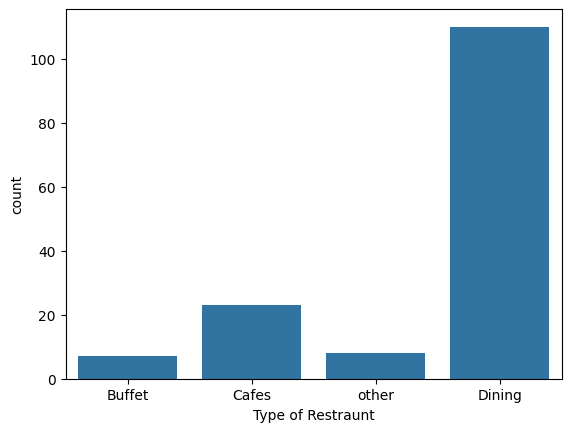

In [5]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restraunt")

**CONCLUSION-1: THE MAXIMUM NO OF ORDERS ARE FROM THE DINING TYPE RESTRAUNTS.**

Text(0, 0.5, 'No of Votes')

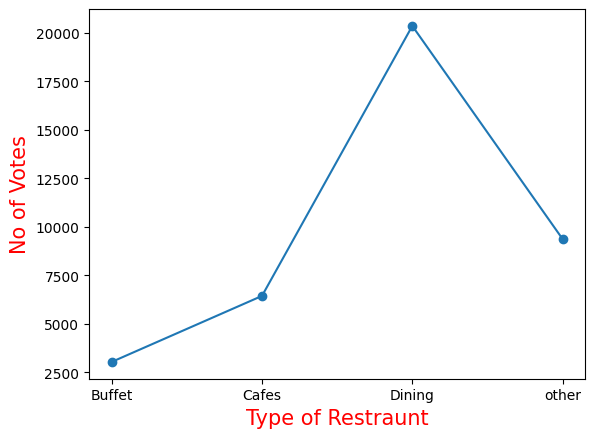

In [21]:
data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': data})
plt.plot(result,marker="o")
plt.xlabel("Type of Restraunt",c= "red",size = 15)
plt.ylabel("No of Votes",c= "red",size = 15)

**CONCLUSION-2: MAXIMUM NO OF VOTES ARE GIVEN TO DINING RESTRAUNTS.**

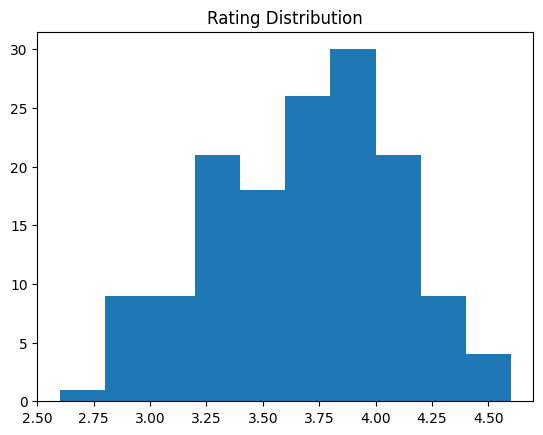

In [22]:
plt.hist(df['rate'])
plt.title("Rating Distribution")
plt.show()

**CONCLUSION-3:MOST OF THE RATING IS BETWEEN 3.5 TO 4.**

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

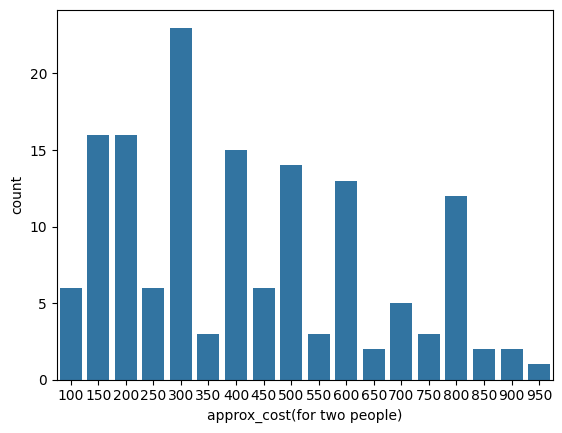

In [24]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

**CONCLUSION-4: AVERAGE ORDER VALUE OF A COUPLE IS 300.**

In [41]:
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

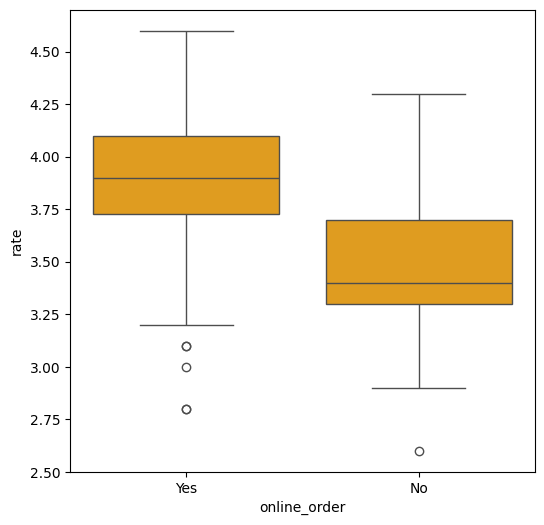

In [33]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',color='orange',data=df)

**CONCLUSION-5: HIGHEST RATING IS GIVEN IN ONLINE ORDERS.**

Text(0.5, 23.52222222222222, 'Online Order')

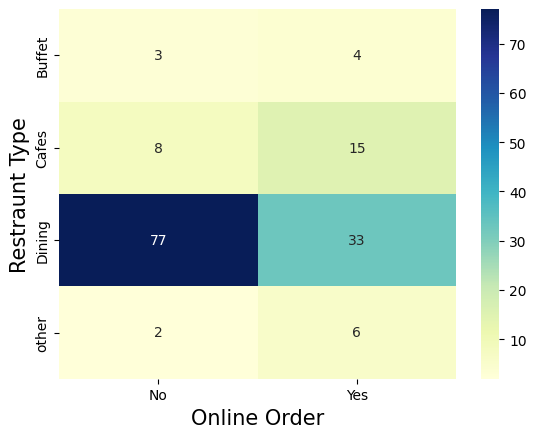

In [52]:
pivot_table =df.pivot_table(index='listed_in(type)',columns ='online_order',aggfunc='size')
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu')
plt.ylabel('Restraunt Type',size=15)
plt.xlabel('Online Order',size=15)

**CONCLUSION-6: MAXIMUM ONLINE AS WELL AS OFFLINE ORDERS ARE DONE FROM THE DINING RESTRAUNTS.**